In [1]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
bit_strings = [f"{x:0{3}b}" for x in range(8)]

In [3]:
# the density matrix to swap test to discern unique values
dev2 = qml.device('default.qubit', wires=9)

@qml.qnode(dev2)
def cswap(arr):
    # input state
    coeff = np.sqrt(np.ones(len(arr[0]))/len(arr[0]))
    base = np.array(arr[0])
    qml.Superposition(coeff, base, wires=[1,2,3], work_wire=4)
    # ref state
    coeff = np.sqrt(np.ones(len(arr[1]))/len(arr[1]))
    base = np.array(arr[1])
    qml.Superposition(coeff, base, wires=[5,6,7], work_wire=8)
    
    qml.Hadamard(0)
    qml.CSWAP([0,1,5])
    qml.CSWAP([0,2,6])
    qml.CSWAP([0,3,7])
    
    qml.Hadamard(0)

    qml.Barrier(range(9))
    qml.measure(4)
    qml.measure(8)

    
    return qml.probs(0)

test_arr = [[[0,0,0],[0,0,1],[1,1,1]],[[0,0,0], [0,1,1],[1,0,1], [1,1,0], [1,1,1]]]
cswap(test_arr)

array([0.63333333, 0.36666667])

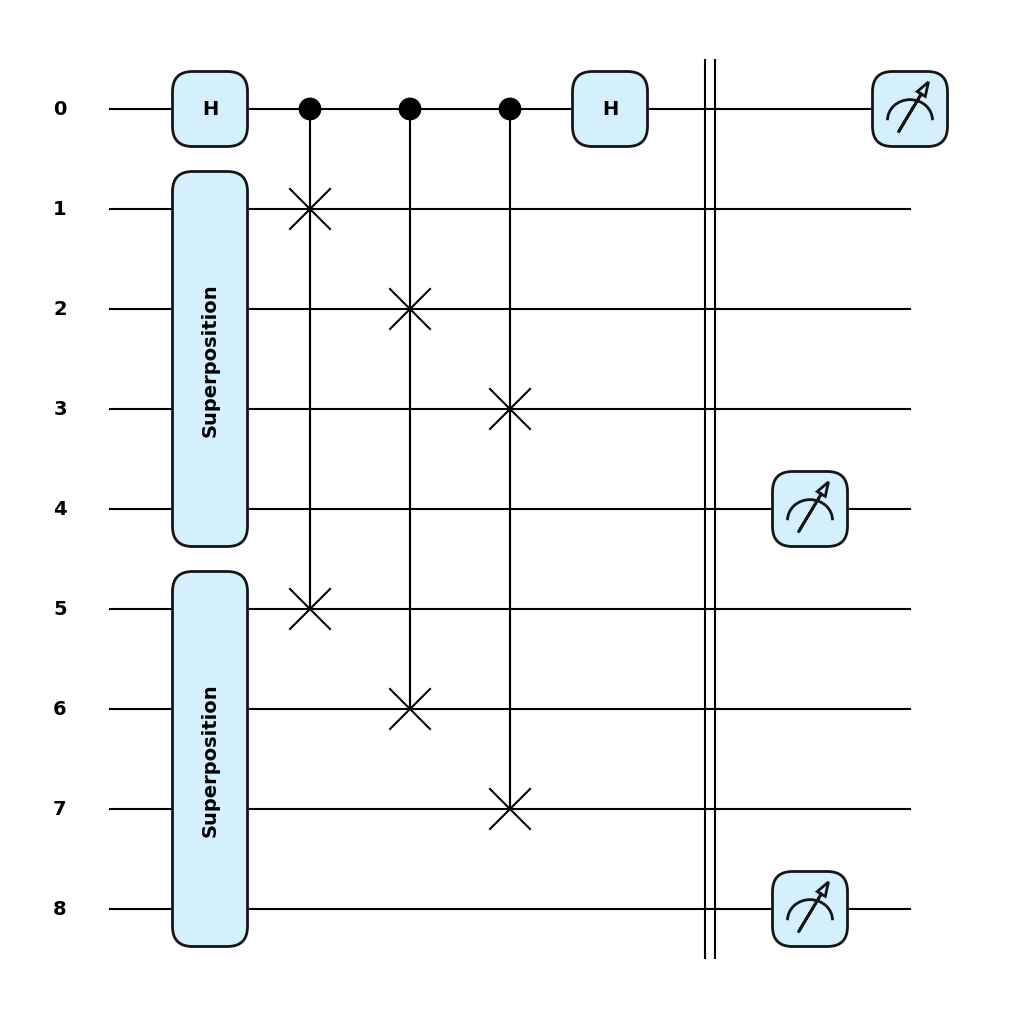

In [4]:
fig, _ = qml.draw_mpl(cswap, style="pennylane", show_all_wires=True)(test_arr)
plt.show()

In [29]:
# the density matrix to swap test to discern unique values
dev2 = qml.device('default.qubit', wires=9)

@qml.qnode(dev2)
def GroverSearch(arr, iter=1):
    # input state
    coeff = np.sqrt(np.ones(len(arr[0]))/len(arr[0]))
    base = np.array(arr[0])
    qml.Superposition(coeff, base, wires=[1,2,3], work_wire=4)
    # ref state
    coeff = np.sqrt(np.ones(len(arr[1]))/len(arr[1]))
    base = np.array(arr[1])
    qml.Superposition(coeff, base, wires=[5,6,7], work_wire=8)
    
    qml.Hadamard(0)
    qml.CSWAP([0,1,5])
    qml.CSWAP([0,2,6])
    qml.CSWAP([0,3,7])
    
    qml.Hadamard(0)
    p = qml.measure(0)

    qml.Barrier(range(9))
    qml.measure(4)
    qml.measure(8)
    
    for _ in range(iter): # amplify A
        qml.FlipSign([0,0,0], wires=[5,6,7])
        qml.FlipSign([0,0,1], wires=[5,6,7])
        qml.FlipSign([1,1,1], wires=[5,6,7])
        qml.templates.GroverOperator(wires=[5,6,7])

    return qml.probs(op=p), qml.probs([5,6,7])
    
GroverSearch(test_arr)

(array([0.66666667, 0.33333333]),
 array([0.13541667, 0.01041667, 0.09375   , 0.09375   , 0.09375   ,
        0.21875   , 0.21875   , 0.13541667]))

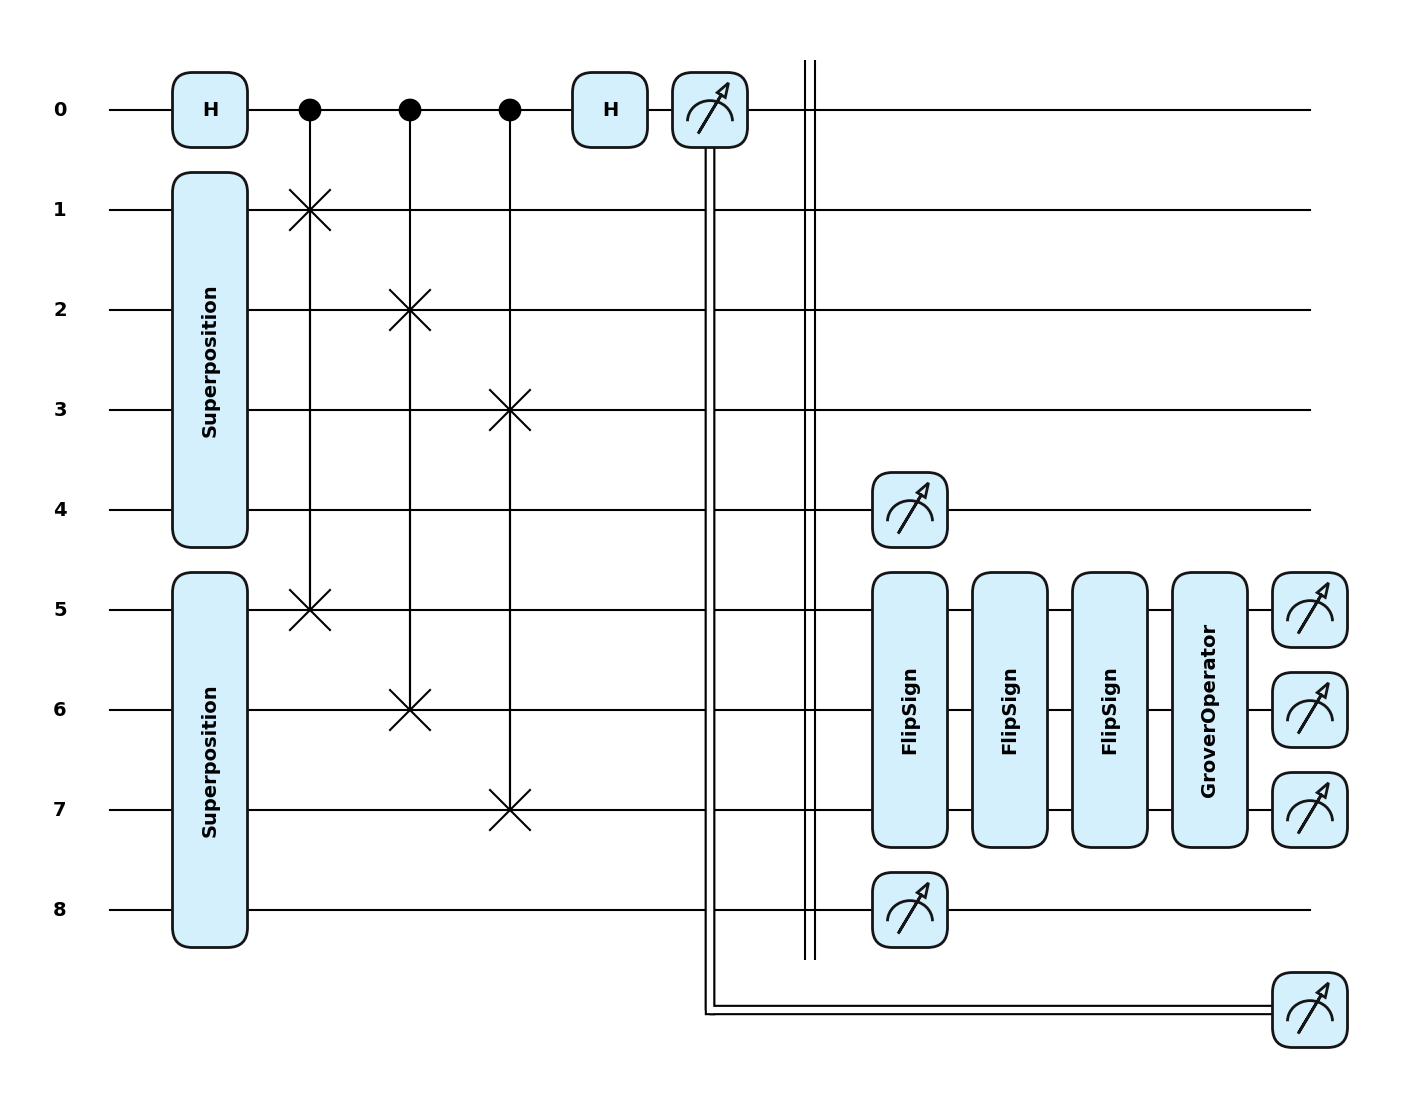

In [30]:
fig, _ = qml.draw_mpl(GroverSearch, style="pennylane", show_all_wires=True)(test_arr)
plt.show()

In [31]:
fig.savefig('swap_two_states.png')

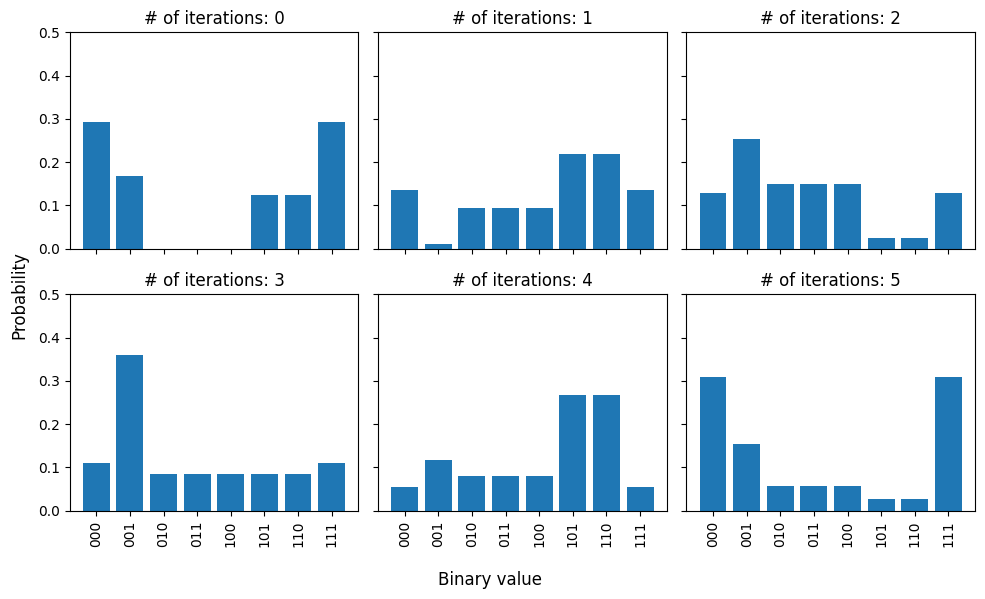

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6), sharex=True, sharey=True)

for i, ax in enumerate(axes.flat):  # Flatten the 2D array of axes
    probabilities = GroverSearch(test_arr, iter=i)[1]
    ax.bar(bit_strings, probabilities)
    # ax.set_xlabel("Binary value")
    # ax.set_ylabel("Probability")
    ax.set_xticks(range(len(bit_strings)))  # Set tick locations
    ax.set_xticklabels(bit_strings, rotation="vertical")  # Rotate labels
    ax.set_ylim([0,0.5])
    ax.set_title(f'# of iterations: {i}')
fig.supxlabel("Binary value")
fig.supylabel("Probability")
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [78]:
# the density matrix to swap test to discern unique values
dev2 = qml.device('default.qubit', wires=13)

@qml.qnode(dev2)
def GroverSearch(arr, iter1=1, iter2=1):
    # input state
    coeff = np.sqrt(np.ones(len(arr[0]))/len(arr[0]))
    base = np.array(arr[0])
    qml.Superposition(coeff, base, wires=[1,2,3], work_wire=4)
    # ref state
    coeff = np.sqrt(np.ones(len(arr[1]))/len(arr[1]))
    base = np.array(arr[1])
    qml.Superposition(coeff, base, wires=[5,6,7], work_wire=8)
    qml.Superposition(coeff, base, wires=[9,10,11], work_wire=12)
    
    qml.Hadamard(0)
    qml.CSWAP([0,1,5])
    qml.CSWAP([0,2,6])
    qml.CSWAP([0,3,7])
    
    qml.Hadamard(0)
    p = qml.measure(0)

    qml.measure(4)
    qml.measure(8)
    
    for _ in range(1): #5
        qml.FlipSign([0,0,0], wires=[5,6,7])
        qml.FlipSign([0,0,1], wires=[5,6,7])
        qml.FlipSign([1,1,1], wires=[5,6,7])
        qml.templates.GroverOperator(wires=[5,6,7])

    q1 = qml.measure(5)
    q2 = qml.measure(6)
    q3 = qml.measure(7)
    q = [q1, q2, q3]
    qml.Barrier(range(13))
        
    # Grover excluding the intersection
    for _ in range(iter1): #6
        qml.FlipSign([0,0,1], wires=[1,2,3])
        qml.templates.GroverOperator(wires=[1,2,3])
        
    for _ in range(iter2): #2
        qml.FlipSign([0,1,1], wires=[9,10,11])
        qml.FlipSign([1,0,1], wires=[9,10,11])
        qml.FlipSign([1,1,0], wires=[9,10,11])
        qml.templates.GroverOperator(wires=[9,10,11])    
    return qml.probs(op=p), qml.probs(op=q), qml.probs([1,2,3]), qml.probs([9,10,11])

GroverSearch(test_arr)

(array([0.63333333, 0.36666667]),
 array([0.16666667, 0.01666667, 0.1       , 0.15      , 0.1       ,
        0.15      , 0.15      , 0.16666667]),
 array([0.1       , 0.41666667, 0.16666667, 0.01666667, 0.16666667,
        0.01666667, 0.01666667, 0.1       ]),
 array([0.3125, 0.0125, 0.0125, 0.1125, 0.0125, 0.1125, 0.1125, 0.3125]))

Matplotlib is building the font cache; this may take a moment.


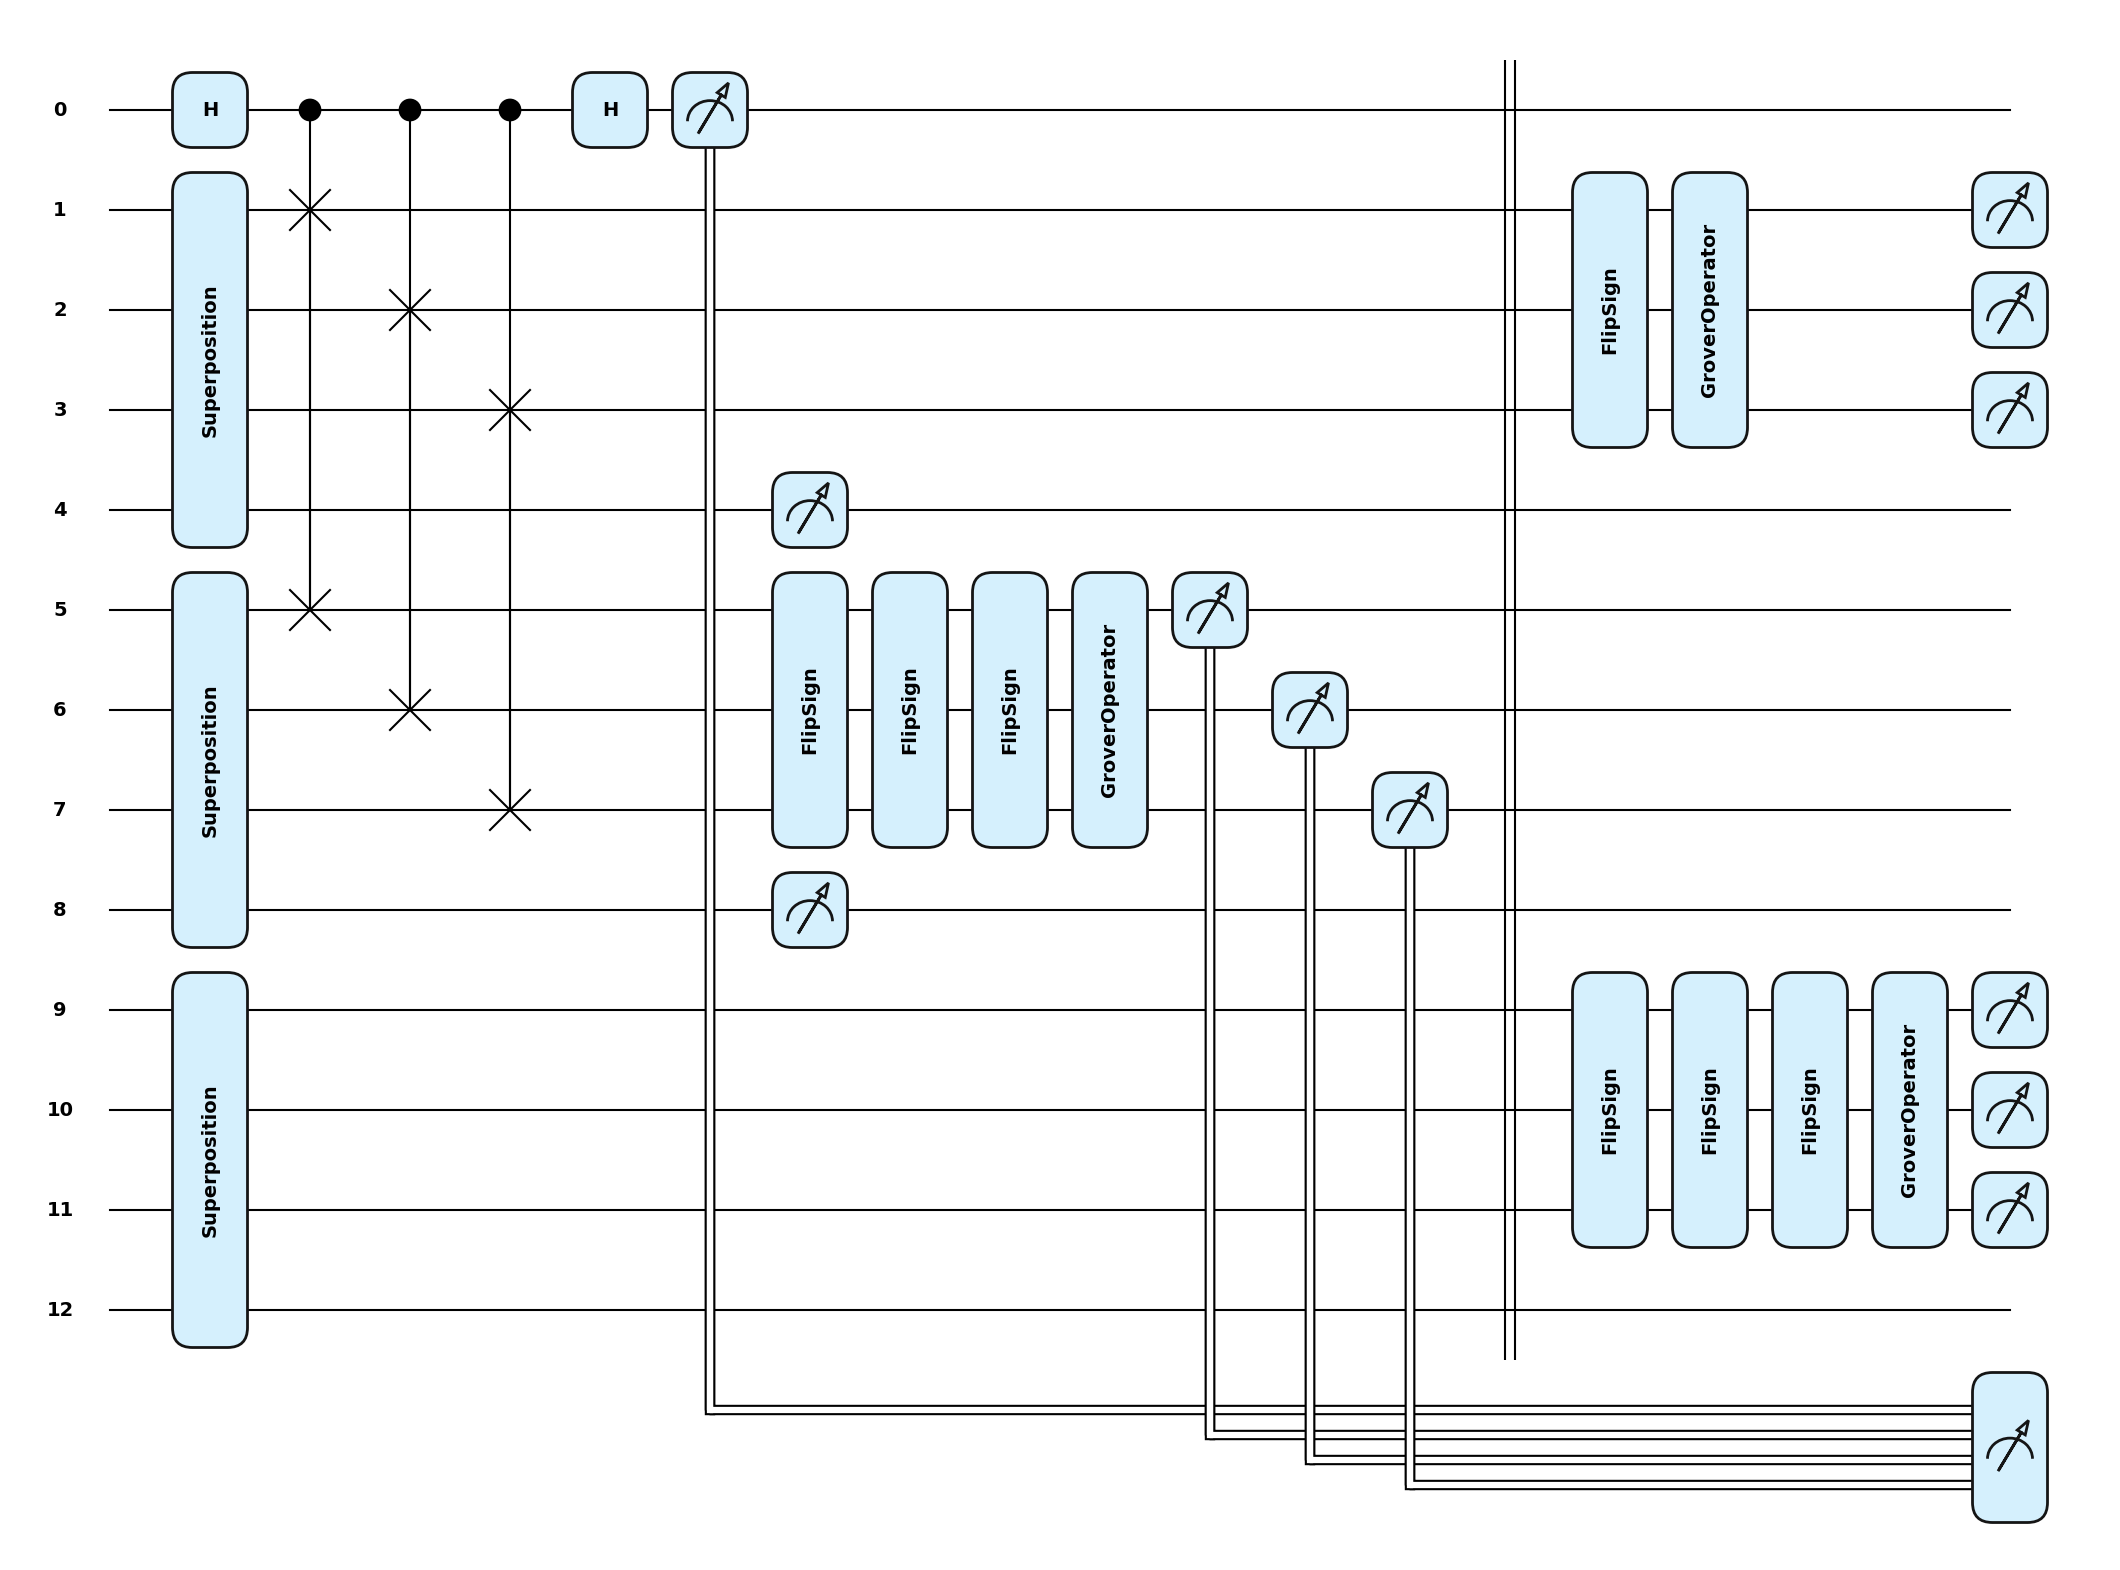

In [79]:
fig, _ = qml.draw_mpl(GroverSearch, style="pennylane", show_all_wires=True)(test_arr)
plt.show()

In [80]:
fig.savefig('set_operation_grover1.png')

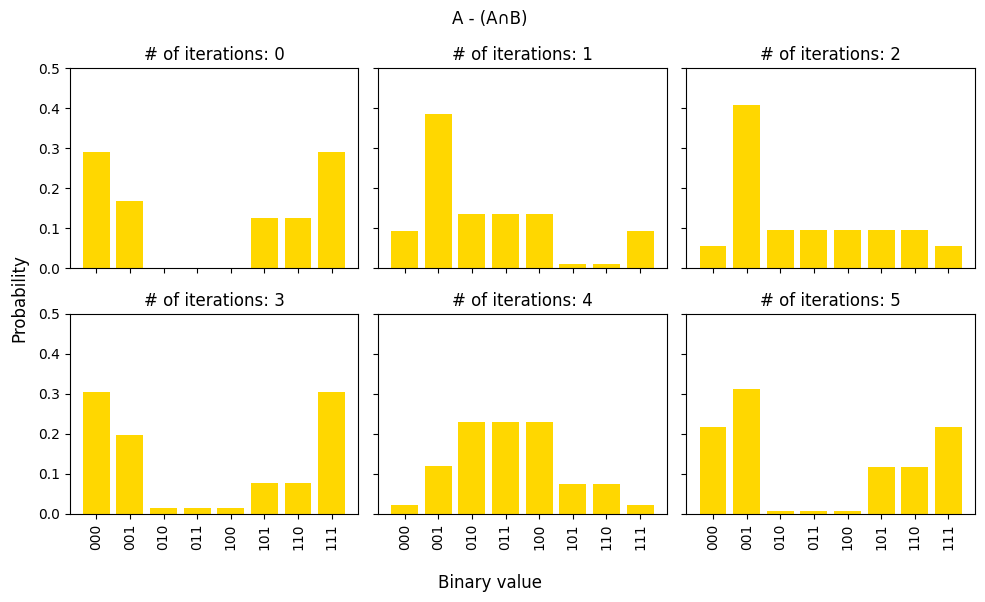

In [49]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6), sharex=True, sharey=True)

for i, ax in enumerate(axes.flat):  # Flatten the 2D array of axes
    probabilities = GroverSearch(test_arr, iter1=i)[2]
    ax.bar(bit_strings, probabilities, color='gold')
    # ax.set_xlabel("Binary value")
    # ax.set_ylabel("Probability")
    ax.set_xticks(range(len(bit_strings)))  # Set tick locations
    ax.set_xticklabels(bit_strings, rotation="vertical")  # Rotate labels
    ax.set_ylim([0,0.5])
    ax.set_title(f'# of iterations: {i}')
fig.suptitle("A - (A∩B)")
fig.supxlabel("Binary value")
fig.supylabel("Probability")
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

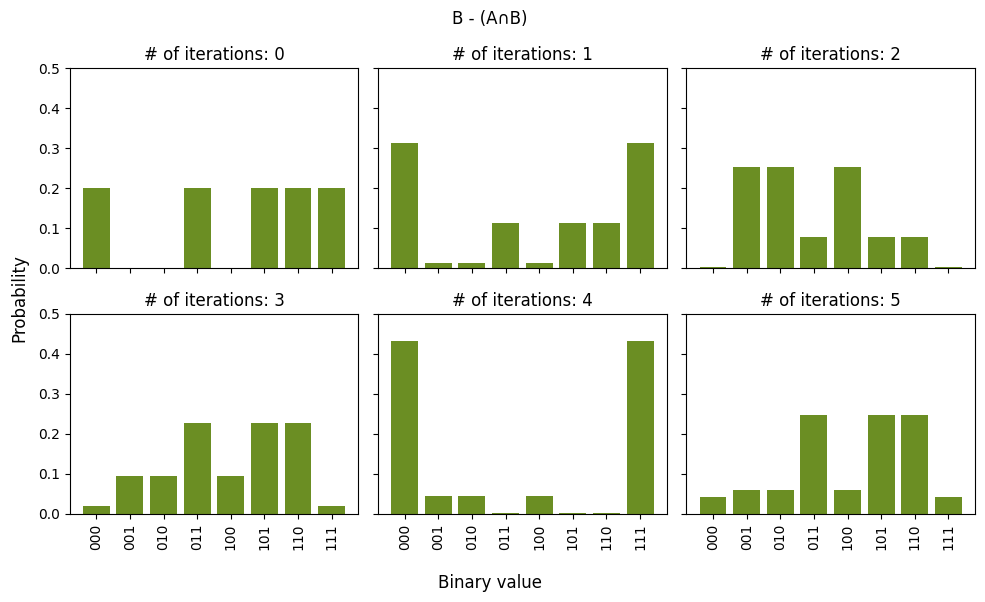

In [81]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6), sharex=True, sharey=True)

for i, ax in enumerate(axes.flat):  # Flatten the 2D array of axes
    probabilities = GroverSearch(test_arr, iter2=i)[3]
    ax.bar(bit_strings, probabilities, color='olivedrab')
    ax.set_xticks(range(len(bit_strings)))  # Set tick locations
    ax.set_xticklabels(bit_strings, rotation="vertical")  # Rotate labels
    ax.set_ylim([0,0.5])
    ax.set_title(f'# of iterations: {i}')
fig.suptitle("B - (A∩B)")
fig.supxlabel("Binary value")
fig.supylabel("Probability")
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
# the density matrix to swap test to discern unique values
dev2 = qml.device('default.qubit', wires=17)

@qml.qnode(dev2)
def GroverSearch(arr, iter1=1, iter2=1, iter3=1):
    # input state
    coeff = np.sqrt(np.ones(len(arr[0]))/len(arr[0]))
    base = np.array(arr[0])
    qml.Superposition(coeff, base, wires=[1,2,3], work_wire=4)
    # ref state
    coeff = np.sqrt(np.ones(len(arr[1]))/len(arr[1]))
    base = np.array(arr[1])
    qml.Superposition(coeff, base, wires=[5,6,7], work_wire=8)
    # qml.Superposition(coeff, base, wires=[9,10,11], work_wire=12)
    
    qml.Hadamard(0)
    qml.CSWAP([0,1,5])
    qml.CSWAP([0,2,6])
    qml.CSWAP([0,3,7])
    
    qml.Hadamard(0)
    p = qml.measure(0)
    qml.Barrier(range(17))
    
    qml.measure(4)
    qml.measure(8)
    
    for _ in range(1): #5
        qml.FlipSign([0,0,0], wires=[5,6,7])
        qml.FlipSign([0,0,1], wires=[5,6,7])
        qml.FlipSign([1,1,1], wires=[5,6,7])
        qml.templates.GroverOperator(wires=[5,6,7])
    
    q1 = qml.measure(5)
    q2 = qml.measure(6)
    q3 = qml.measure(7)
    q = [q1, q2, q3]
    qml.Barrier(range(17))

    qml.Superposition(coeff, base, wires=[9,10,11], work_wire=12)
    
    # Grover excluding the intersection
    for _ in range(iter1): #1
        qml.FlipSign([0,0,1], wires=[1,2,3])
        qml.templates.GroverOperator(wires=[1,2,3])
    l1 = qml.measure(1)
    l2 = qml.measure(2)
    l3 = qml.measure(3)
    l = [l1, l2, l3]
        
    for _ in range(iter2): #3
        qml.FlipSign([0,1,1], wires=[9,10,11])
        qml.FlipSign([1,0,1], wires=[9,10,11])
        qml.FlipSign([1,1,0], wires=[9,10,11])
        qml.templates.GroverOperator(wires=[9,10,11])    
    qml.measure(12)
    r1 = qml.measure(9)
    r2 = qml.measure(10)
    r3 = qml.measure(11)
    r = [r1, r2, r3]

    qml.Barrier(range(17))
    tot = [[0,0,0],[0,0,1],[0,1,0],[1,0,0],[1,1,0],[1,0,1],[0,1,1],[1,1,1]]
    coeff = np.sqrt(np.ones(len(tot))/len(tot))
    base = np.array(tot)
    qml.Superposition(coeff, base, wires=[13,14,15], work_wire=16)

    for _ in range(iter3):
        qml.FlipSign([1,0,0], wires=[13,14,15])
        qml.FlipSign([0,1,0], wires=[13,14,15])
        qml.templates.GroverOperator(wires=[13,14,15]) 

    qml.measure(16)

    return qml.probs(op=p), qml.probs(op=l), qml.probs(op=q), qml.probs(op=r), qml.probs([13,14,15]) #, qml.probs([1,2,3]), qml.probs([9,10,11]), qml.probs([13,14,15]) 

GroverSearch(test_arr)

In [ ]:
fig, _ = qml.draw_mpl(GroverSearch, style="pennylane", show_all_wires=True)(test_arr)
plt.show()

In [8]:
fig.savefig('grover4.png')

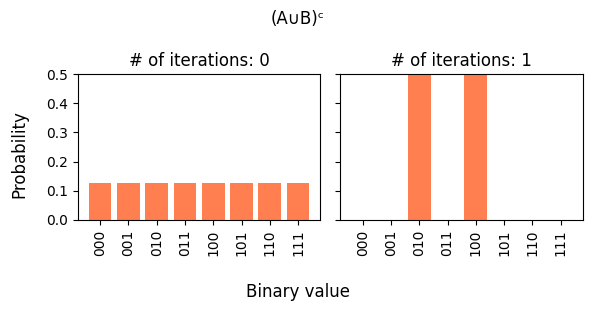

In [121]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3), sharex=True, sharey=True)

for i, ax in enumerate(axes.flat):  # Flatten the 2D array of axes
    probabilities = GroverSearch(test_arr, iter3=i)[2]
    ax.bar(bit_strings, probabilities, color='coral')
    ax.set_xticks(range(len(bit_strings)))  # Set tick locations
    ax.set_xticklabels(bit_strings, rotation="vertical")  # Rotate labels
    ax.set_ylim([0,0.5])
    ax.set_title(f'# of iterations: {i}')
fig.suptitle("(A∪B)ᶜ")
fig.supxlabel("Binary value")
fig.supylabel("Probability")
plt.tight_layout() 
plt.show()

In [122]:
fig.savefig('grover_final.png')